In [31]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math

In [32]:
!wget https://course.ccs.neu.edu/cs6220/homework-4/data/f150_motor_distributors.txt

--2023-03-01 14:02:39--  https://course.ccs.neu.edu/cs6220/homework-4/data/f150_motor_distributors.txt
Resolving course.ccs.neu.edu (course.ccs.neu.edu)... 129.10.117.35
Connecting to course.ccs.neu.edu (course.ccs.neu.edu)|129.10.117.35|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 255541 (250K) [text/plain]
Saving to: ‘f150_motor_distributors.txt.1’

f150_motor_distribu 100%[===================>] 249.55K  --.-KB/s    in 0.1s    

2023-03-01 14:02:40 (1.88 MB/s) - ‘f150_motor_distributors.txt.1’ saved [255541/255541]



In [33]:
df = pd.read_csv('/content/f150_motor_distributors.txt', delimiter= ',', names=["timing_speed", "coil_gap"])
df.head(10)

,timing_speed,coil_gap
0,-11.969996,-8.039628
1,-26.961416,-6.962109
2,-12.915849,-1.378941
3,22.476144,2.066612
4,-13.146631,4.835322
5,36.851734,2.470103
6,-9.067511,-1.179764
7,-22.889891,-1.020943
8,-2.358063,1.240317
9,22.832520,1.705266


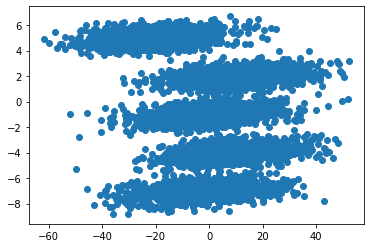

In [34]:
plt.scatter(df["timing_speed"], df["coil_gap"])

In [35]:
x1 = np.array([10.0, 10.0])
x2 = np.array([-10.0, -10.0])
x3 = np.array([2.0, 2.0])
x4 = np.array([3.0, 3.0])
x5 = np.array([-3.0, -3.0])

In [36]:
centroids = np.array([x1, x2, x3, x4, x5])

In [37]:
data = df.iloc[:, [0, 1]].values
data

array([[-11.96999577,  -8.03962819],
       [-26.96141582,  -6.96210943],
       [-12.91584891,  -1.37894148],
       ...,
       [ 12.92550271,  -0.10319682],
       [-34.33677838,   4.4057531 ],
       [-26.81273855,  -1.63995599]])

In [38]:
class KMeans:
  def __init__(self, n_clusters, max_iter, centroids):
    self.n_clusters = n_clusters
    self.max_iter = max_iter
    self.centroids = centroids

  def fit(self, X):       
    for i in range(self.max_iter):
      distances = np.sqrt(((X - self.centroids[:, np.newaxis])**2).sum(axis=2))
      cluster_labels = np.argmin(distances, axis=0)
            
    for j in range(self.n_clusters):
      self.centroids[j] = X[cluster_labels == j].mean(axis=0)

  def predict(self, X):
    distances = np.sqrt(((X - self.centroids[:, np.newaxis])**2).sum(axis=2))
    return np.argmin(distances, axis=0)

In [39]:
km = KMeans(5, 100, centroids)
km.fit(data)

# Question 1a

## Centroids after 100 iterations

In [40]:
km.centroids

array([[ 23.23559962,  -0.37277404],
       [-23.07182069,  -0.55933281],
       [  3.48813997,  -1.49181348],
       [  9.85453395,  -1.08932849],
       [ -5.32034801,  -1.63246345]])

# Question 1b

In [41]:
labels = km.predict(data)

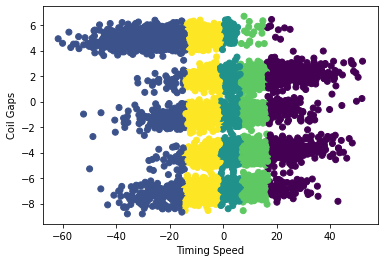

In [42]:
plt.scatter(data[:, 0], data[:, 1], c=labels)
plt.xlabel('Timing Speed')
plt.ylabel('Coil Gaps')
plt.show()

# Question 1c


## It can be seen that the data distributed in 5 strips along the x-axis, so the number of clusters = 5 is reasonable and logical

## It does not cluster well, since each cluster does not showed inner relationship

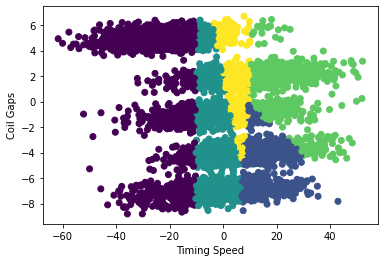

In [43]:
x6 = np.array([-10, -8])
x7 = np.array([10, -5])
x8 = np.array([1, -1])
x9 = np.array([10, 2])
x10 = np.array([5, 5])

update_centroids = np.array([x6, x7, x8, x9, x10])

km1 = KMeans(5, 100, update_centroids)
km1.fit(data)
new_labels = km1.predict(data)

plt.scatter(data[:, 0], data[:, 1], c=new_labels)
plt.xlabel('Timing Speed')
plt.ylabel('Coil Gaps')
plt.show()

# Question 2a

In [44]:
def mahalanobis_distance(X, Y, P):
  diff = X - Y
  cov_inv = np.dot(P.T, P)
  cov_inv = np.linalg.inv(cov_inv)
  return np.sqrt(np.dot(np.dot(diff.T, cov_inv), diff))

In [45]:
P = np.array([[10.0, 0.5], [-10.0, 0.25]])

In [46]:
for i in range(100):

  clusters = [[], [], [], [], []]

  for j in range(5000):
      distances = [mahalanobis_distance(data[j], centroids[k], P) for k in range(5)]
      cluster = np.argmin(distances)
      clusters[cluster].append(j)
  for c in range(5):
      if clusters[c]:
          centroids[c] = np.mean(data[clusters[c]], axis=0)

output_centroids = centroids
centroids = np.array([x1, x2, x3, x4, x5])

In [47]:
print("Clusters:", clusters)
print("Centroids:", output_centroids)

Clusters: [[3, 5, 8, 9, 13, 17, 21, 24, 28, 29, 33, 34, 37, 45, 51, 56, 62, 63, 64, 68, 70, 76, 106, 125, 126, 129, 130, 131, 134, 136, 140, 145, 151, 162, 165, 166, 169, 179, 185, 196, 198, 201, 205, 206, 209, 210, 211, 212, 214, 219, 229, 234, 237, 243, 244, 254, 255, 259, 263, 265, 271, 273, 287, 288, 290, 292, 302, 303, 310, 314, 316, 321, 344, 350, 359, 360, 367, 369, 374, 376, 377, 378, 379, 387, 398, 404, 411, 420, 421, 426, 429, 432, 435, 438, 439, 446, 447, 453, 456, 463, 468, 471, 472, 473, 484, 487, 492, 493, 501, 506, 508, 518, 519, 544, 547, 551, 558, 559, 568, 573, 577, 589, 591, 595, 599, 601, 606, 610, 615, 624, 627, 632, 633, 639, 640, 642, 661, 669, 676, 679, 683, 686, 698, 700, 712, 716, 722, 724, 725, 732, 739, 759, 761, 763, 764, 768, 778, 780, 781, 782, 787, 789, 797, 800, 806, 814, 829, 830, 831, 833, 836, 839, 841, 854, 861, 874, 876, 893, 897, 901, 903, 905, 907, 910, 914, 922, 923, 932, 940, 944, 948, 955, 963, 973, 985, 986, 987, 992, 995, 1000, 1004, 1007, 1

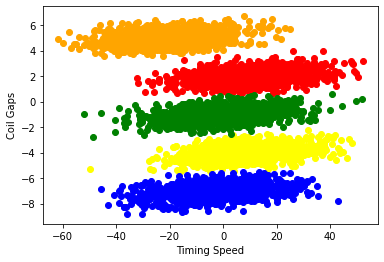

In [48]:
colors=['red', 'orange', 'yellow', 'green', 'blue']
labels=['cluster 1','cluster 2','cluster 3','cluster 4','cluster 5']
for i, cluster in enumerate(clusters):
    plt.scatter(data[cluster, 0], data[cluster, 1], color = colors[i],label=labels[i])
plt.xlabel('Timing Speed')
plt.ylabel('Coil Gaps')
plt.show()

# Question 2b

In [49]:
new_df = df - df.mean()
new_df

,timing_speed,coil_gap
0,-10.749873,-7.036019
1,-25.741293,-5.958501
2,-11.695726,-0.375333
3,23.696267,3.070220
4,-11.926508,5.838931
...,...,...
4995,8.072791,2.552685
4996,-1.120606,-6.339860
4997,14.145626,0.900412
4998,-33.116656,5.409362


In [50]:
cov = np.cov(new_df.T)
eigenvalues, eigenvectors = np.linalg.eig(cov)
eigenvalues, eigenvectors

(array([322.50713273,  17.38845582]), array([[ 0.99838317,  0.05684225],
        [-0.05684225,  0.99838317]]))

In [51]:
indices = np.argsort(eigenvalues)[::-1]
indices

array([0, 1])

In [52]:
eigenvectors_sorted = eigenvectors[:, indices]
eigenvectors_sorted

array([[ 0.99838317,  0.05684225],
       [-0.05684225,  0.99838317]])

# Question 2c

## No, they are not the same

In [53]:
len(cluster)

1000

In [54]:
len(clusters[1])

1000

In [55]:
for i, cluster in enumerate(clusters):
  cov = np.cov((data[cluster] - data[cluster].mean()).T)
  eigenvalues, eigenvectors = np.linalg.eig(cov)
  indices = np.argsort(eigenvalues)[::-1]
  print(i)
  print("eigenvalues: ", eigenvectors[:, indices])

0
eigenvalues:  [[ 0.99993306 -0.01157047]
 [ 0.01157047  0.99993306]]
1
eigenvalues:  [[ 0.99993527 -0.01137789]
 [ 0.01137789  0.99993527]]
2
eigenvalues:  [[ 0.99989374 -0.01457781]
 [ 0.01457781  0.99989374]]
3
eigenvalues:  [[ 0.99990986 -0.01342629]
 [ 0.01342629  0.99990986]]
4
eigenvalues:  [[ 0.99992533 -0.01222027]
 [ 0.01222027  0.99992533]]


# Question 2d

In [56]:
eig1, eig2 = np.linalg.eig(P.T)
new_P = np.dot(eig1, eig2.T).T
new_P

array([10.02645889,  1.04999268])

## The P' is transformed from the relationship matrix 

## So it is still can be seen as a relationship matrix for data

# Question 3a

In [109]:
frequent_3_itemsets = [    [1, 2, 3],
    [1, 2, 4],
    [1, 2, 5],
    [1, 3, 4],
    [2, 3, 4],
    [2, 3, 5],
    [3, 4, 5],
]

In [110]:
frequent_1_itemsets = [[1], [2], [3], [4], [5]]

In [111]:
def generate_candidate_4_itemsets(frequent_3_itemsets, frequent_1_itemsets):
    candidate_4_itemsets = set()
    for itemset_1 in frequent_3_itemsets:
        for itemset_2 in frequent_1_itemsets:
            if itemset_2[0] not in itemset_1:
                candidate_4_itemset = tuple(sorted(itemset_1 + itemset_2))
                candidate_4_itemsets.add(candidate_4_itemset)
    return candidate_4_itemsets

In [112]:
candidate_4_itemsets = generate_candidate_4_itemsets(frequent_3_itemsets, frequent_1_itemsets)
print("Candidate 4-itemsets:", candidate_4_itemsets)

Candidate 4-itemsets: {(1, 3, 4, 5), (1, 2, 3, 5), (1, 2, 3, 4), (2, 3, 4, 5), (1, 2, 4, 5)}


# Question 3b

In [107]:
def new_generate_candidate_4_itemsets(frequent_k_itemsets):
    candidate_4_itemsets = set()
    for i in range(len(frequent_k_itemsets)):
        for j in range(i+1, len(frequent_k_itemsets)):
            if frequent_k_itemsets[i][:-1] == frequent_k_itemsets[j][:-1]:
                candidate_4_itemset = tuple(frequent_k_itemsets[i]) + (frequent_k_itemsets[j][-1],)
                candidate_4_itemsets.add(candidate_4_itemset)
    return candidate_4_itemsets

In [108]:
candidate_4_itemsets = new_generate_candidate_4_itemsets(frequent_3_itemsets)
print("Candidate 4-itemsets:", candidate_4_itemsets)

Candidate 4-itemsets: {(1, 2, 3, 4), (1, 2, 3, 5), (1, 2, 4, 5), (2, 3, 4, 5)}


# Question 3c

In [113]:
candidate_4_itemsets = generate_candidate_4_itemsets(frequent_3_itemsets, frequent_1_itemsets)
print("Candidate 4-itemsets:", candidate_4_itemsets)

Candidate 4-itemsets: {(1, 3, 4, 5), (1, 2, 3, 5), (1, 2, 3, 4), (2, 3, 4, 5), (1, 2, 4, 5)}


### Manual count:
#### (1,3,4,5): 2
#### (1,2,3,5): 3
#### (1,2,3,4): 4
#### (2,3,4,5): 3
#### (1,2,4,5)：2

#### so it is (1,2,3,4)

# Question 4a
###  3*(3^1 + 3^2 + 3^3 + 3^4 + #^5 + 3^6) = 603


# Question 4b:
### 2/4 = 0.5

# Question 4c
### 2

# Question 4d

### True. Since {a,b} is a subset of {a,b,c,d}, and {a, b, c, d} is a frquent itemset, {a, b} must has the same frequency. Thus, {a, b} is always a frequent itemset

# Question 4e

### True. If all of 3 are frequent itemsets, it means that each of them has comparative frquency among the whole dataset. {a, b, c} as the superset of them, must also appeaered frequently in the dataset, which make itself a frequent dataset


# Question 4f
### false, since {b} is a subset of {b, c} so it also appeared as {b, c} appeared. So, the support if {b} should be large or equal to 30

#  Question 4g
### False. The maximum number of size-2 frequent itemsets that can be extracted from a dataset with 5 items is 5C2 = 10.